### Homework 14

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time


from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [33]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [34]:
# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

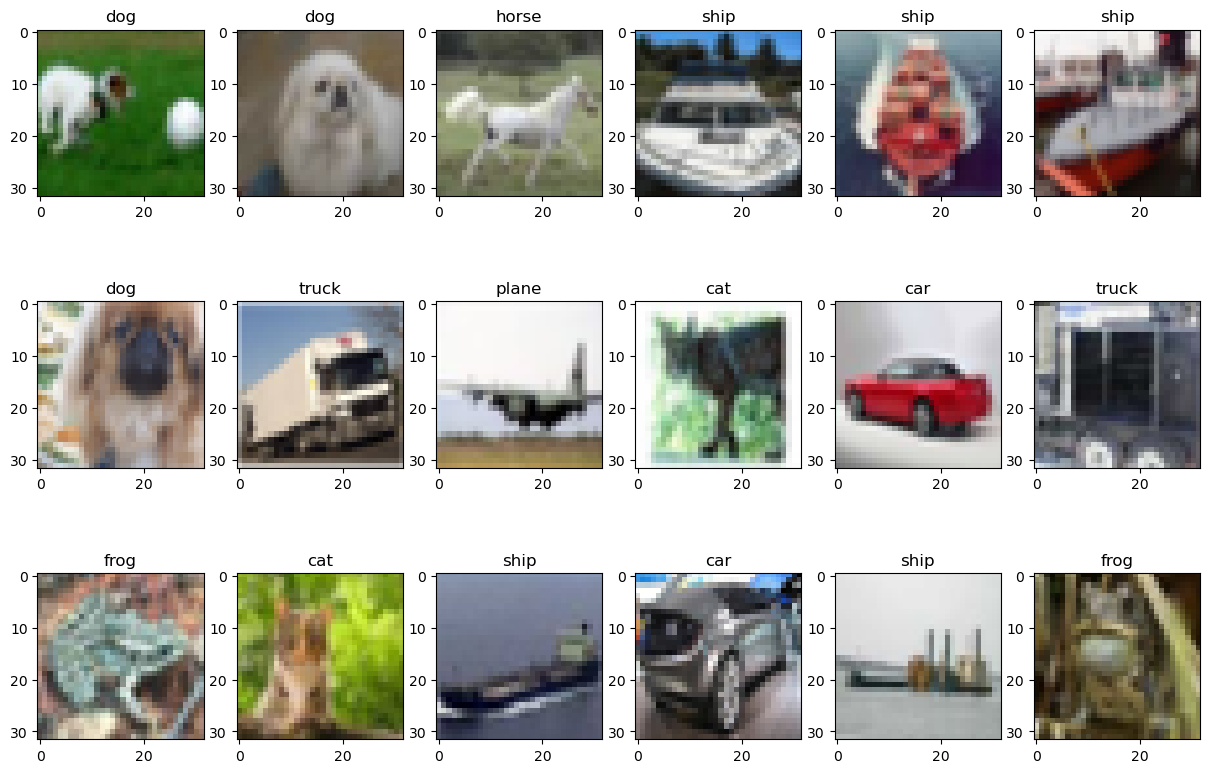

In [35]:
# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3, 6, ii + 1)
    # Pick a random sample
    idx = np.random.randint(len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])
plt.show()


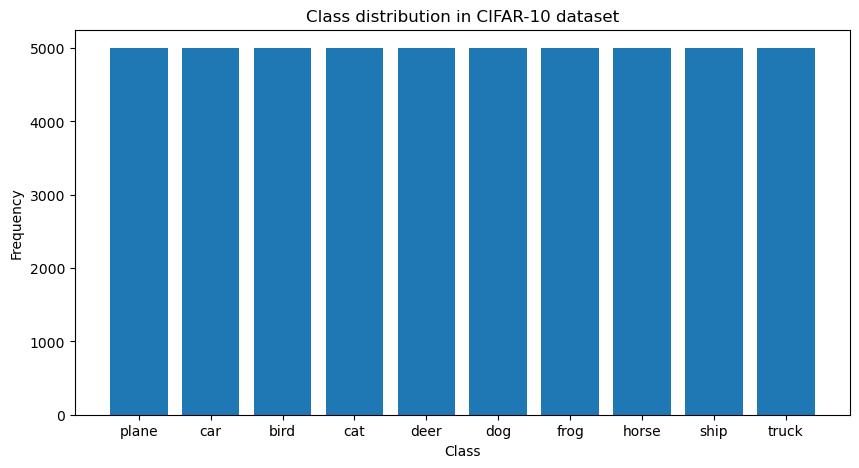

In [36]:
from collections import Counter

# Compute the class histogram
hist = Counter(y_train.flatten())

# Plot the class histogram
plt.figure(figsize=(10, 5))
plt.bar(hist.keys(), hist.values(), tick_label=[classes[i] for i in hist.keys()])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class distribution in CIFAR-10 dataset')
plt.show()


In [37]:
for class_id, count in hist.items():
    print(f"{classes[class_id]}: {count}")

frog: 5000
truck: 5000
deer: 5000
car: 5000
bird: 5000
horse: 5000
ship: 5000
cat: 5000
dog: 5000
plane: 5000


In [38]:
# Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [19]:
# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:', len(y_train), 'samples')
print('Test set:', len(y_test), 'samples')
print('Sample dims:', x_train.shape)


Train set: 50000 samples
Test set: 10000 samples
Sample dims: (50000, 32, 32, 3)


In [20]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
net = Dense(128, activation="relu")(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856 

In [21]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/25
352/352 [==============================] - 46s 131ms/step - loss: 1.5617 - accuracy: 0.4365 - val_loss: 1.3993 - val_accuracy: 0.5044
Epoch 2/25
352/352 [==============================] - 43s 122ms/step - loss: 1.1492 - accuracy: 0.5924 - val_loss: 1.0617 - val_accuracy: 0.6260
Epoch 3/25
352/352 [==============================] - 44s 126ms/step - loss: 0.9699 - accuracy: 0.6597 - val_loss: 0.9054 - val_accuracy: 0.6884
Epoch 4/25
352/352 [==============================] - 43s 123ms/step - loss: 0.8468 - accuracy: 0.7048 - val_loss: 0.8360 - val_accuracy: 0.7118
Epoch 5/25
352/352 [==============================] - 34s 97ms/step - loss: 0.7600 - accuracy: 0.7352 - val_loss: 0.8052 - val_accuracy: 0.7244
Epoch 6/25
352/352 [==============================] - 37s 105ms/step - loss: 0.6972 - accuracy: 0.7590 - val_loss: 0.7689 - val_accuracy: 0.7430
Epoch 7/25
352/352 [==============================] - 34s 98ms/step - loss: 0.6342 - accuracy: 0.7815 - val_loss: 0.7925 - val_accu

Train Acc      0.970977783203125
Validation Acc 0.7343999743461609


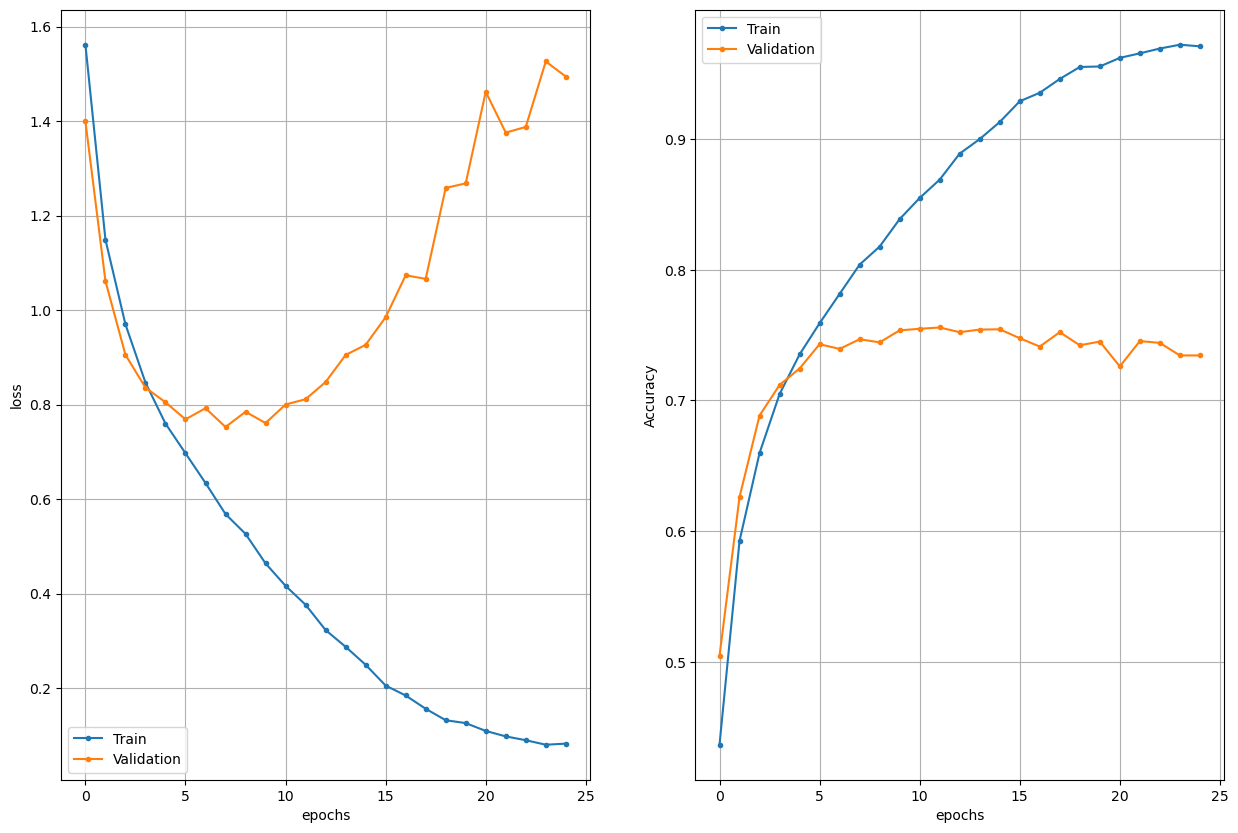

In [22]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

In [23]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 3s 9ms/step


In [24]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    acc = np.sum((y_true == class_id) & (y_pred == class_id)) / np.sum(y_true == class_id)
    print(f"{class_name}: {acc:.4f}")

plane: 0.8030
car: 0.7990
bird: 0.6350
cat: 0.5960
deer: 0.6210
dog: 0.6050
frog: 0.7540
horse: 0.7500
ship: 0.8190
truck: 0.8180


In [25]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss:', ev[0])
print('Test metric:', ev[1])

313/313 [==============================] - 3s 10ms/step - loss: 1.6206 - accuracy: 0.7200
Test loss: 1.6206464767456055
Test metric: 0.7200000286102295


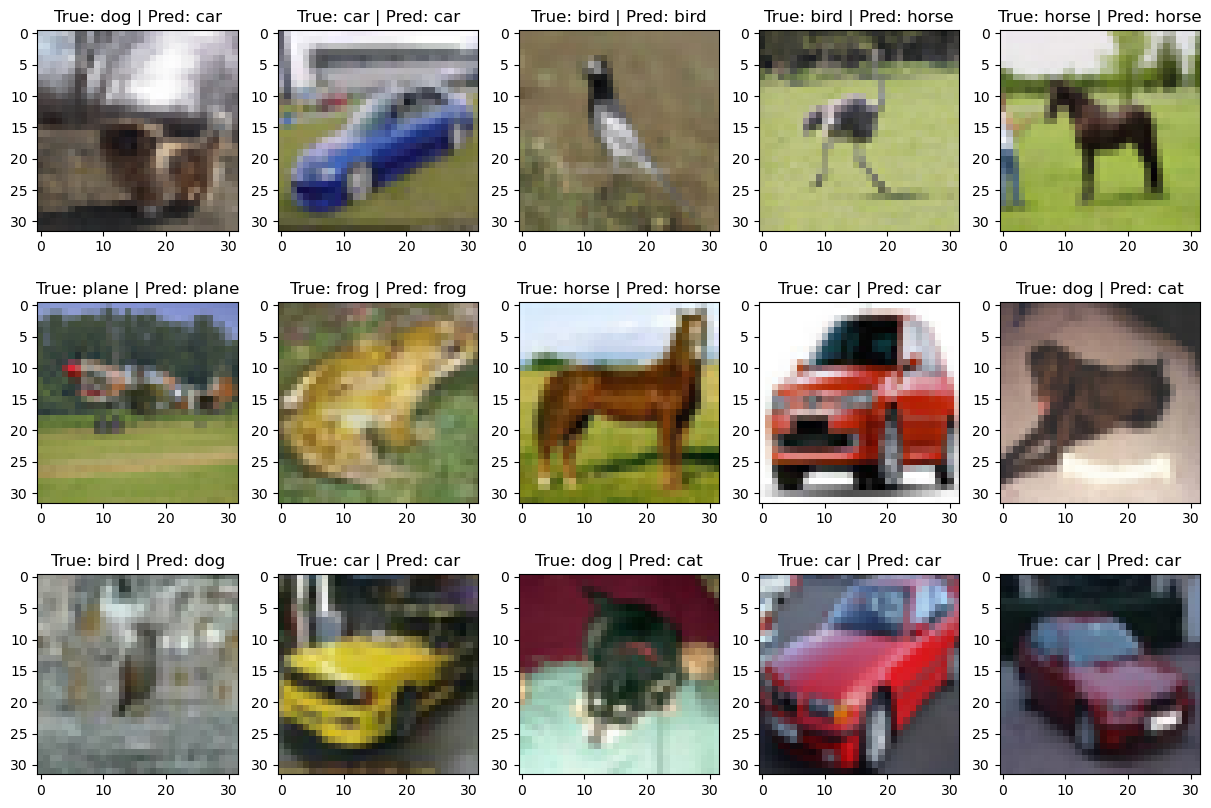

In [26]:
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(len(x_test))
    # Show the results
    plt.subplot(3, 5, ii + 1)
    plt.imshow(x_test[idx, ...])
    plt.title(f"True: {classes[y_true[idx]]} | Pred: {classes[y_pred[idx]]}")
plt.show()

*ANWERS*
1. Accuracy - 0.7200000286102295
2. To improve accuracy, I've used "dropout" (found this method in a previous lecture). It improved accuracy a bit (from 0.72 to 0.77). Maybe, another way is to add more layers, but not sure.
3. The result of "dropout" is below

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                      

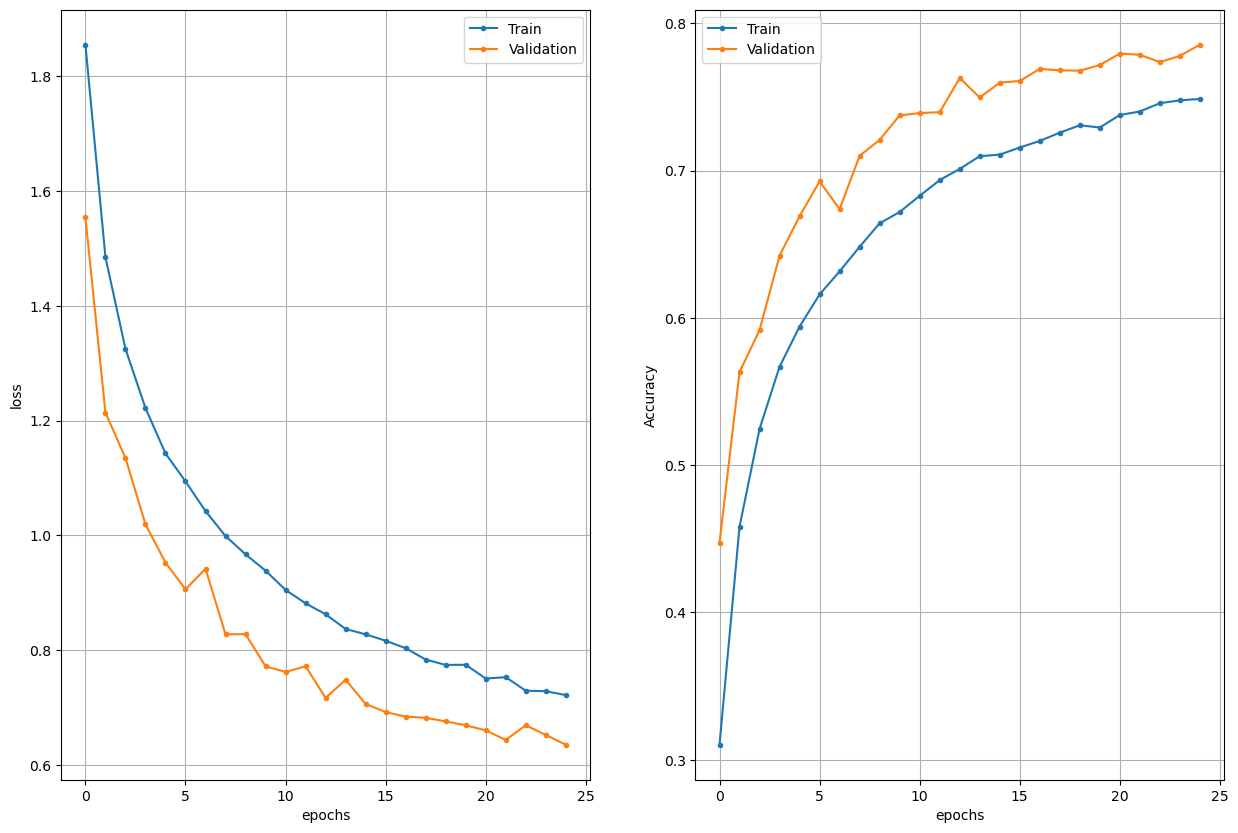

313/313 [==============================] - 3s 9ms/step - loss: 0.6715 - accuracy: 0.7723
Modified Test loss: 0.6714516282081604
Modified Test metric: 0.7723000049591064
313/313 [==============================] - 5s 14ms/step
plane: 0.7830
car: 0.8880
bird: 0.7030
cat: 0.5930
deer: 0.7420
dog: 0.6490
frog: 0.8030
horse: 0.8240
ship: 0.8860
truck: 0.8520


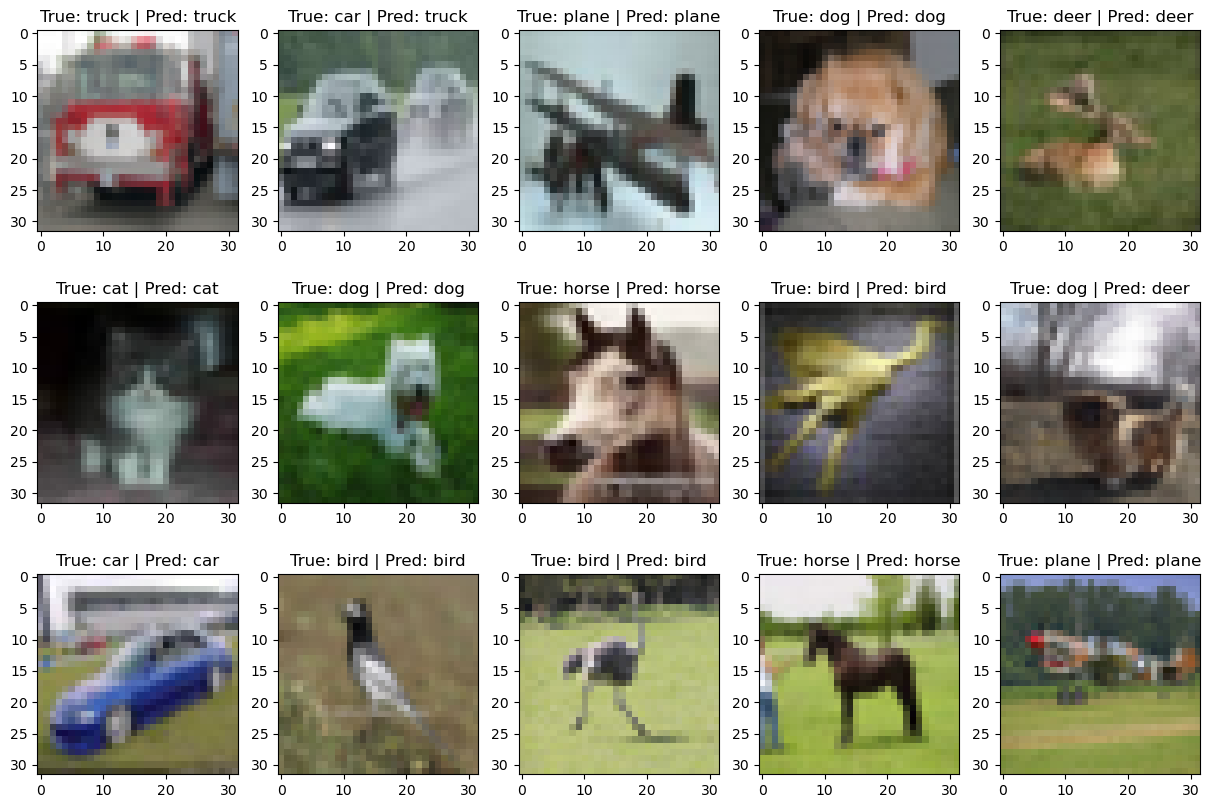

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout
from tensorflow.keras import Model
from time import time
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed

seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Mapping from class ID to class name
classes = {0: 'plane', 1: 'car', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Build the classifier with dropout
inputs = Input(shape=(size, size, 3))

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)
net = Flatten()(net)
net = Dense(128, activation="relu")(net)
net = Dropout(0.5)(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 25
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Show training history
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121)
plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'])

plt.subplot(122)
plt.plot(epochs, h['accuracy'], '.-', epochs, h['val_accuracy'], '.-')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc:', h['accuracy'][-1])
print('Validation Acc:', h['val_accuracy'][-1])
plt.show()

# Re-evaluate the modified model
ev = model.evaluate(x_test, y_test)
print('Modified Test loss:', ev[0])
print('Modified Test metric:', ev[1])

# Compute the labels and predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    acc = np.sum((y_true == class_id) & (y_pred == class_id)) / np.sum(y_true == class_id)
    print(f"{class_name}: {acc:.4f}")

# Show random samples with predictions
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(len(x_test))
    # Show the results
    plt.subplot(3, 5, ii + 1)
    plt.imshow(x_test[idx, ...])
    plt.title(f"True: {classes[y_true[idx]]} | Pred: {classes[y_pred[idx]]}")
plt.show()
